<a href="https://colab.research.google.com/github/engige/nlp_consumer_complaints_classification/blob/main/index_colab_sv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Complaints Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import pandas as pd

# Define the path to the zip file and the CSV file inside it
zip_path = '/content/drive/MyDrive/data_comp.zip'
csv_filename = 'consumer_complaints.csv'

# Open the zip file and load the CSV file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open(csv_filename) as file:
        df = pd.read_csv(file)

# Displaying the first few raws of the dataframe
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [3]:
# Displaying basic information about the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [4]:
# Dropping the unnecessary 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Dropping rows with missing values in the 'narrative' column
df = df.dropna(subset=['narrative'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162411 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162411 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [5]:
# Checking for duplicate rows based on 'product' and 'narrative' columns
duplicates = df.duplicated(subset=['product', 'narrative']).sum()

duplicates

37735

In [6]:
# Checking the distribution of the 'product' categories
product_distribution = df['product'].value_counts()

product_distribution

,count
product,
credit_reporting,91172
debt_collection,23148
mortgages_and_loans,18990
credit_card,15566
retail_banking,13535


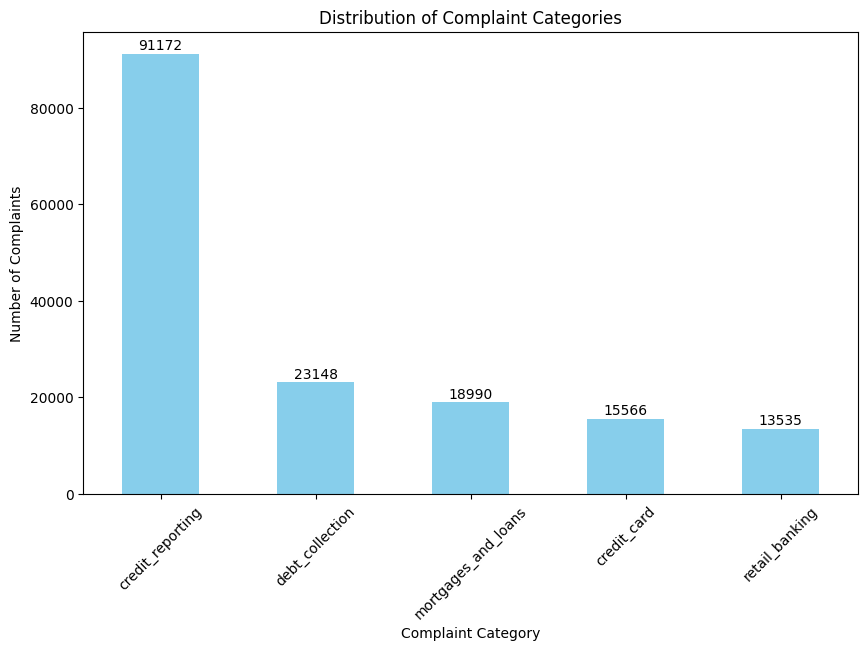

In [7]:
import matplotlib.pyplot as plt

# Plotting the distribution of complaint categories with complaint counts on top of each bar
plt.figure(figsize=(10, 6))
ax = product_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Complaint Categories')
plt.xlabel('Complaint Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)

# Adding text labels on top of each bar
for i, count in enumerate(product_distribution):
    ax.text(i, count + 200, str(count), ha='center', va='bottom')

plt.show()

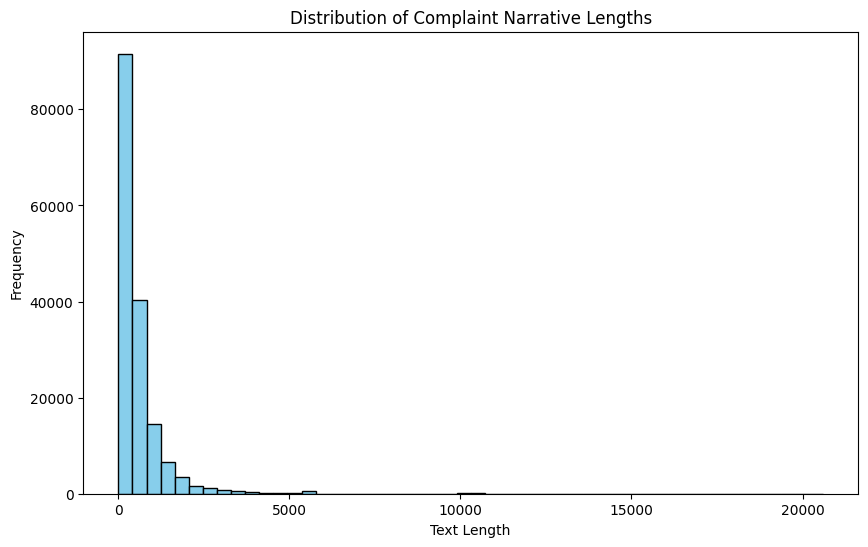

,text_length
count,162411.000000
mean,588.535838
std,830.977413
min,3.000000
25%,192.000000
50%,361.000000
75%,683.000000
max,20596.000000


In [8]:
import matplotlib.pyplot as plt

# Checking the length of the complaint narrative
# Calculating the length of each complaint narrative
df['text_length'] = df['narrative'].apply(len)

# Summary statistics for text length
text_length_summary = df['text_length'].describe()

# Plotting the distribution of text length
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Complaint Narrative Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

text_length_summary

## Data Preprocessing

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Ensure that NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initializing stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Defining the preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join words back into a single string with whitespace handling
    cleaned_text = ' '.join(words).strip()  # Remove leading/trailing whitespace
    return ' '.join(cleaned_text.split())    # Replace multiple spaces with a single space

# Applying preprocessing to the 'narrative' column
df['cleaned_narrative'] = df['narrative'].apply(preprocess_text)

# Displaying a sample of the cleaned narratives
df[['narrative', 'cleaned_narrative']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,narrative,cleaned_narrative
0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...
1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...
2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...
3,payment history missing credit report speciali...,payment history missing credit report speciali...
4,payment history missing credit report made mis...,payment history missing credit report made mis...


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame and 'cleaned_narrative' is the preprocessed text column
# Step 1: Count words in each complaint
df['word_count'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Step 2: Get summary statistics for word counts
word_count_summary = df['word_count'].describe()
print("Word Count Summary:\n", word_count_summary)

Word Count Summary:
 count    162411.000000
mean         80.207935
std         108.821314
min           1.000000
25%          27.000000
50%          50.000000
75%          95.000000
max        2684.000000
Name: word_count, dtype: float64


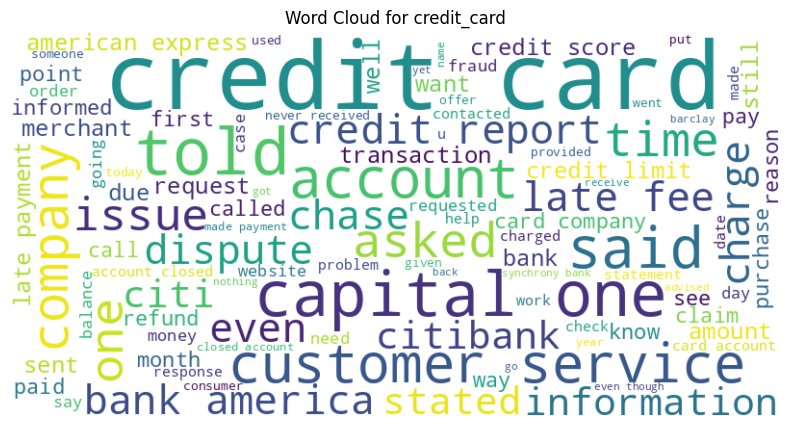

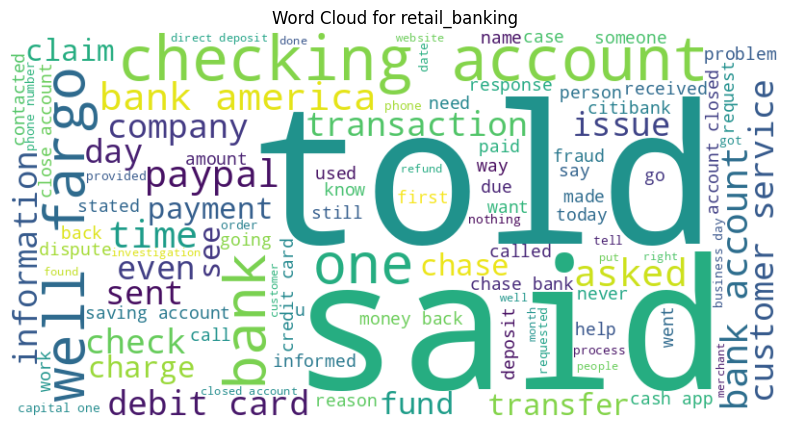

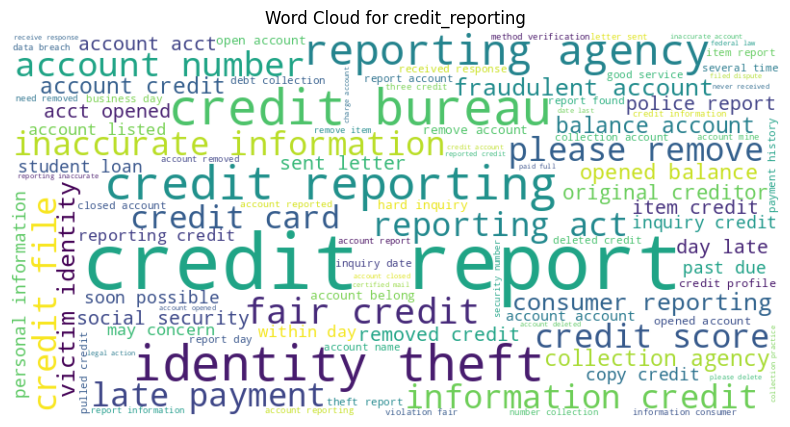

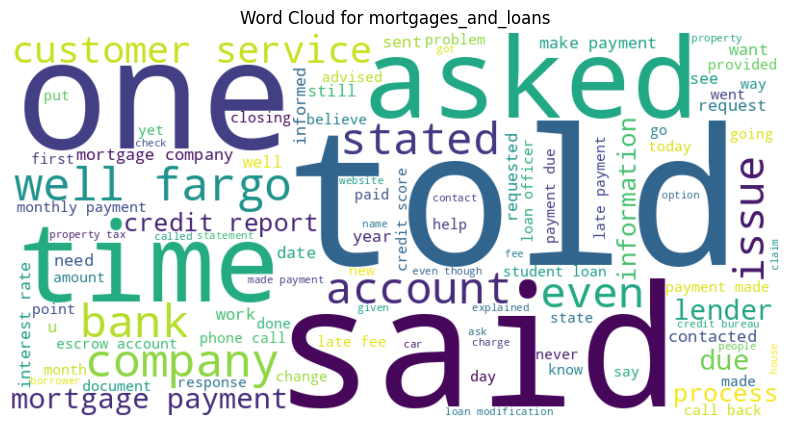

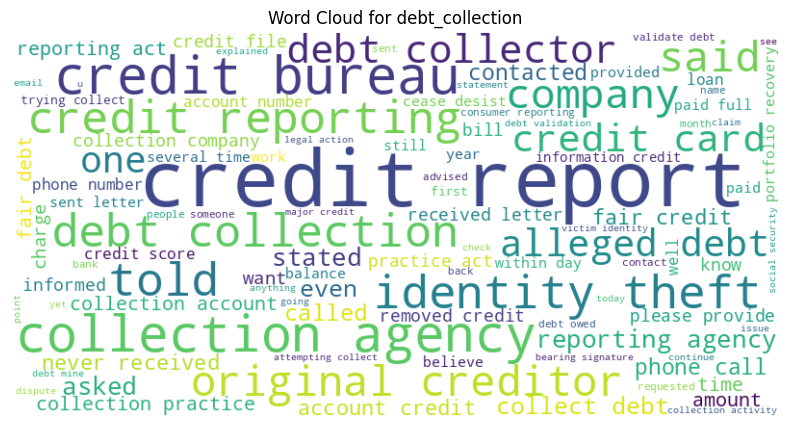

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Checking the most common words in each class
# Function to generate word cloud for each product label
def generate_word_cloud(data, product_label):
    text = ' '.join(data['cleaned_narrative'][data['product'] == product_label])
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {product_label}')
    plt.axis('off')
    plt.show()

# Get unique product labels
product_labels = df['product'].unique()

# Generate and display word cloud for each product label
for label in product_labels:
    generate_word_cloud(df, label)

In [12]:
import pandas as pd

# Calculate text length
if 'text_length' not in df.columns:
    df['text_length'] = df['cleaned_narrative'].apply(len)

# Calculate word count
if 'number_of_words' not in df.columns:
    df['number_of_words'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Adding text length column (character count for each narrative)
df['text_length'] = df['cleaned_narrative'].apply(len)

# Adding word count column (number of words in each narrative)
df['number_of_words'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Display the relevant columns in the DataFrame
cleaned_df = df[['product', 'cleaned_narrative', 'text_length', 'number_of_words']]

# View the first few rows
cleaned_df.head()

,product,cleaned_narrative,text_length,number_of_words
0,credit_card,purchase order day shipping amount receive pro...,1705,230
1,credit_card,forwarded message date tue subject please inve...,904,132
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,173
3,credit_reporting,payment history missing credit report speciali...,903,131
4,credit_reporting,payment history missing credit report made mis...,851,123


In [13]:
from sklearn.preprocessing import LabelEncoder

# Ensure cleaned_df is a copy of the original DataFrame
cleaned_df = cleaned_df.copy()

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'product' column and assign it to the new 'target' column
cleaned_df['target'] = label_encoder.fit_transform(cleaned_df['product'])

# Display the first few rows to verify the target encoding
cleaned_df.head()

,product,cleaned_narrative,text_length,number_of_words,target
0,credit_card,purchase order day shipping amount receive pro...,1705,230,0
1,credit_card,forwarded message date tue subject please inve...,904,132,0
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,173,4
3,credit_reporting,payment history missing credit report speciali...,903,131,1
4,credit_reporting,payment history missing credit report made mis...,851,123,1


In [14]:
# Create a dictionary to map each product category to its numeric label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Mapping of product categories to numeric targets:")
for product, target in label_mapping.items():
    print(f"{product}: {target}")

Mapping of product categories to numeric targets:
credit_card: 0
credit_reporting: 1
debt_collection: 2
mortgages_and_loans: 3
retail_banking: 4


## Data Transformation

In [15]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target (y)
X = cleaned_df['cleaned_narrative']
y = cleaned_df['target']

# Perform the train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting splits
print("Training set shapes (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shapes (X_test, y_test):", X_test.shape, y_test.shape)

Training set shapes (X_train, y_train): (129928,) (129928,)
Testing set shapes (X_test, y_test): (32483,) (32483,)


Above provides the training and testing sets, with class balance maintained across splits.

## Transformer Model

### Bidirectional Encoder Representations from Transformers (BERT)

In [17]:
!pip install transformers torch datasets scikit-learn

In [18]:
!pip install datasets

In [19]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset
import numpy as np

# Load the BERT tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(set(y_train)))

# Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# Prepare the datasets
train_dataset = Dataset.from_dict({"text": X_train, "label": y_train}).map(tokenize_function, batched=True)
test_dataset = Dataset.from_dict({"text": X_test, "label": y_test}).map(tokenize_function, batched=True)

train_dataset = train_dataset.with_format("torch")
test_dataset = test_dataset.with_format("torch")

# Define the evaluation metric function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# Define training arguments with early stopping
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    metric_for_best_model="f1",
    greater_is_better=True
)

# Trainer with early stopping callback
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # Stops if validation does not improve for 3 epochs
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/129928 [00:00<?, ? examples/s]

Map:   0%|          | 0/32483 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.478500,0.515624,0.873195,0.872113,0.873195,0.870575
2,0.631200,0.563464,0.873472,0.872295,0.873472,0.870580
3,0.193000,0.536766,0.877875,0.876433,0.877875,0.876300
4,0.543000,0.518722,0.877536,0.876623,0.877536,0.875503
5,0.272900,0.489602,0.881907,0.881155,0.881907,0.880887


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.478500,0.515624,0.873195,0.872113,0.873195,0.870575
2,0.631200,0.563464,0.873472,0.872295,0.873472,0.870580
3,0.193000,0.536766,0.877875,0.876433,0.877875,0.876300
4,0.543000,0.518722,0.877536,0.876623,0.877536,0.875503
5,0.272900,0.489602,0.881907,0.881155,0.881907,0.880887
6,0.469700,0.583751,0.819660,0.811559,0.819660,0.793822
7,0.352000,0.547390,0.886802,0.885681,0.886802,0.886068
8,0.512600,0.545489,0.887295,0.885797,0.887295,0.886137
9,0.351600,0.556751,0.889019,0.888627,0.889019,0.888743
10,0.225200,0.577121,0.888773,0.887743,0.888773,0.888078


Evaluation Results: {'eval_loss': 0.5567514896392822, 'eval_accuracy': 0.8890188714096604, 'eval_precision': 0.8886272511800908, 'eval_recall': 0.8890188714096604, 'eval_f1': 0.8887425872105229, 'eval_runtime': 216.4612, 'eval_samples_per_second': 150.064, 'eval_steps_per_second': 18.761, 'epoch': 10.0}


In [24]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions on the test set
predictions = trainer.predict(test_dataset)

# Extract the predicted labels and true labels
preds = np.argmax(predictions.predictions, axis=1)
labels = predictions.label_ids

# Create a list of class names in the correct order for target_names
# Sort `label_mapping` by numeric target to ensure correct order
target_names = [product for product, target in sorted(label_mapping.items(), key=lambda item: item[1])]

# Generate and print the classification report
report = classification_report(labels, preds, target_names=target_names)
print("Classification Report:\n", report)

Classification Report:
                      precision    recall  f1-score   support

        credit_card       0.81      0.79      0.80      3113
   credit_reporting       0.93      0.94      0.93     18235
    debt_collection       0.81      0.80      0.81      4630
mortgages_and_loans       0.86      0.84      0.85      3798
     retail_banking       0.86      0.90      0.88      2707

           accuracy                           0.89     32483
          macro avg       0.85      0.85      0.85     32483
       weighted avg       0.89      0.89      0.89     32483



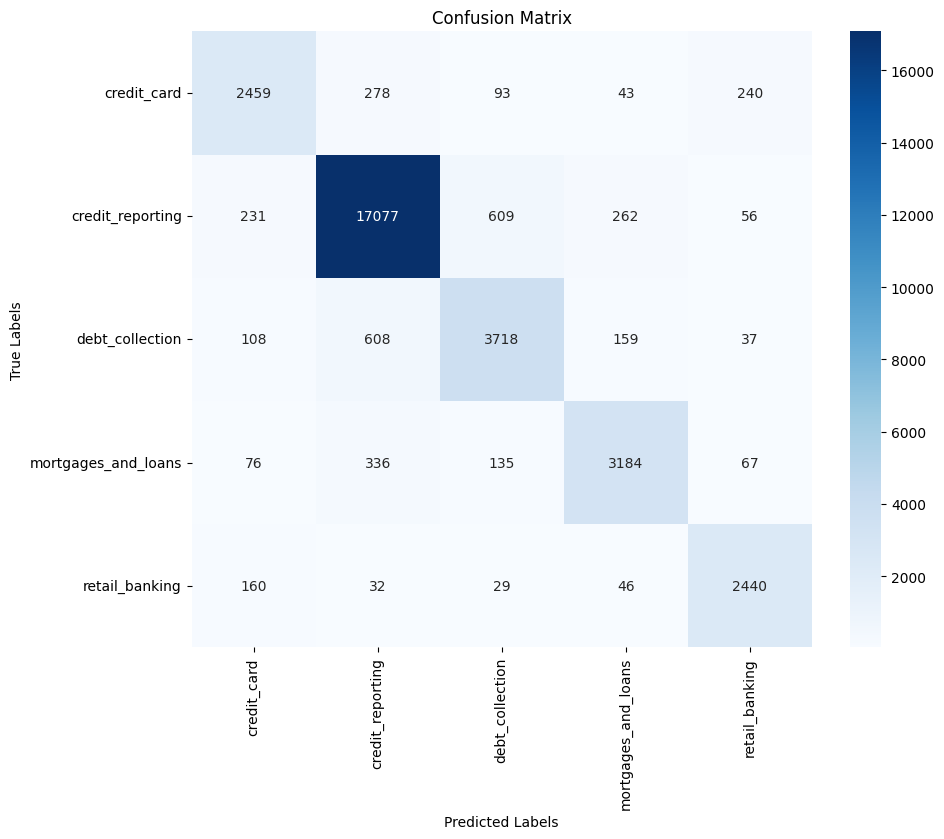

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate the confusion matrix
conf_matrix = confusion_matrix(labels, preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

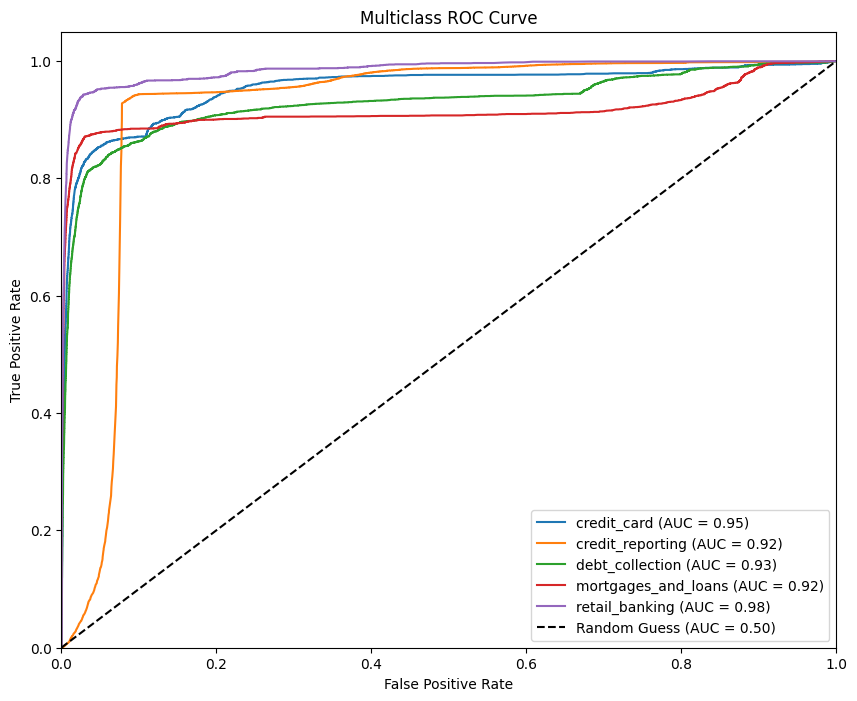

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize

# AUC-ROC Curve
# Binarize the labels for multiclass ROC
labels_binarized = label_binarize(labels, classes=np.arange(len(target_names)))
preds_proba = predictions.predictions  # Use the raw prediction logits

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(labels_binarized[:, i], preds_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [27]:
# Define the directory where the model and tokenizer are saved
output_dir = "/content/drive/MyDrive/saved_bert_model"

# Save the model
trainer.save_model(output_dir)

# Save the tokenizer as well (important for loading the model later)
tokenizer.save_pretrained(output_dir)

print(f"Model and tokenizer saved to {output_dir}")

Model and tokenizer saved to /content/drive/MyDrive/saved_bert_model


In [28]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load the tokenizer and model
loaded_tokenizer = BertTokenizer.from_pretrained(output_dir)
loaded_model = BertForSequenceClassification.from_pretrained(output_dir)

print("Model and tokenizer loaded successfully!")

Model and tokenizer loaded successfully!


In [29]:
# Define the prediction function
def classify_text(text):
    # Tokenize the input text
    inputs = loaded_tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)

    # Move inputs to the same device as the model (CPU or GPU)
    inputs = {key: value.to(loaded_model.device) for key, value in inputs.items()}

    # Perform inference
    with torch.no_grad():
        outputs = loaded_model(**inputs)

    # Get the predicted label (argmax over logits)
    predicted_label = torch.argmax(outputs.logits, dim=1).item()

    return predicted_label

# Define a mapping for labels to class names
label_map = {
    0: "credit_card",
    1: "retail_banking",
    2: "credit_reporting",
    3: "mortgages_and_loans",
    4: "debt_collection"
}

# Classify new examples
new_texts = [
    "I am very unhappy with the service on my credit card.",
    "My mortgage application was declined without any valid reason.",
    "I have been getting spam calls from a loan company.",
    "The bank charged me extra fees without prior notice.",
    "The insurance company is not processing my claim."
]

# Run classification and print results with class names
for text in new_texts:
    label_id = classify_text(text)
    label_name = label_map[label_id]
    print(f"Text: {text}\nPredicted Category: {label_name}\n")

Text: I am very unhappy with the service on my credit card.
Predicted Category: credit_card

Text: My mortgage application was declined without any valid reason.
Predicted Category: mortgages_and_loans

Text: I have been getting spam calls from a loan company.
Predicted Category: mortgages_and_loans

Text: The bank charged me extra fees without prior notice.
Predicted Category: debt_collection

Text: The insurance company is not processing my claim.
Predicted Category: credit_reporting

